In [38]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import random
import math

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
import altair as alt                                # Alternative visualisation system
import math

from statsmodels.graphics.mosaicplot import mosaic

### Exercise 1

The file lightbulbs.csv contains a random sample of
100 lightbulb lifetimes. The company that produces
these lightbulbs wants to know whether it can claim
that its lightbulbs typically last more than 1000 burning
hours.
1. Identify the null and alternative hypotheses for this
situation.
2. Can this lightbulb manufacturer claim that its
lightbulbs typically last more than 1000 hours at
the 5% significance level? What about at the 1%
significance level?


In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/Lightbulbs.csv', sep=";")
df.head()

,Lightbulb,Lifetime
0,1,840.08
1,2,960.00
2,3,953.38
3,4,981.14
4,5,938.66


H0 = 1000

H1 > 1000

In [40]:
aantal1000 = df[df['Lifetime'] >= 1000].count()[0]
aantalonder = df[df['Lifetime'] < 1000].count()[0]
print(aantal1000)
print(aantalonder)

48
52


In [41]:
n = 100                             # Number of samples
sm = df['Lifetime'].mean()          # Sample mean
m0 = 1000
a5 = 0.05                           # 5% significance level
a1 = 0.01                           # 1% significance level
s = np.std(df['Lifetime'],ddof=1)            # Standard deviation


In [47]:
sm

991.0186000000001

In [46]:
p = p = stats.t.cdf(sm, loc=m0, scale=s/np.sqrt(n), df=n-1)
print("p-value: %.5f" % p)
if(p < a5):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

p-value: 0.15268
p > a: do not reject H0


In [48]:
g = m0 - stats.t.isf(a5, df=n-1) * s / np.sqrt(n)
#g = stats.t.isf(a,loc=m0,scale = s/np.sqrt(n),df=n-1)
print("Critical value g ≃ %.3f" % g)
if (sm > g):
    print("sample mean = %.3f > g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f < g = %.3f: reject H0" % (sm, g))

Critical value g ≃ 985.527
sample mean = 991.019 > g = 985.527: do not reject H0


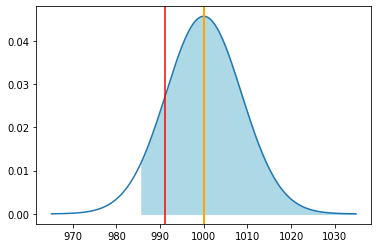

In [44]:
# Gauss-curve
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values
dist_y = stats.t.pdf(dist_x, loc=m0, scale=s/np.sqrt(n), df=n-1)
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(m0, color="orange", lw=2)
# Sample mean in red
dplot.axvline(sm, color="red")
dplot.fill_between(dist_x, 0, dist_y, where=dist_x >= g, color='lightblue')